Please **submit this Jupyter notebook through Canvas** no later than **Friday December 14, 10:59**, before the start of the lecture.

The final project is in **groups of three**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

A single, jointly written report for each group is fine. All members in a group will receive the same grade.

# Exercise 0

**Jordan Earle** (12297127)

**Natasja Wezel** (11027649)

**Esra Solak** (10001812)

----
# Project keywords
Interpolation, least squares, optimization, nonlinear least squares

----
# Project description
In this assignment,  we will explore methods for data fitting and interpolation. Given a dataset of some quantity at different moments in time, such methods can be used to predict future values as well as to compute values at past times where we do not have observations.

Consider the following data set for Arctic sea ice minimum, an important climate signal. Arctic sea ice extent reaches a minimum every year in September. The data, obtained from NASA (see
https://climate.nasa.gov/vital-signs/arctic-sea-ice/), shows the minimum sea ice extent reached in different years. 
In the table, $t$ denotes the year, $s$ denotes the sea ice extent in million square kilometers.

The aim of this project is to explore various ways of fitting functions to this dataset, and see how well they perform and how robust they are.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

years = np.array([1979, 1982, 1985, 1988, 1991, 1994, 1997, 2000, 2003, 2006, 2009, 2012, 2015, 2016], dtype=np.float64)
ice_areas = np.array([7.00, 7.34, 6.79, 7.47, 6.46, 7.15, 6.85, 6.37, 6.21, 5.97, 5.31, 3.40, 4.59, 4.30], dtype=np.float64)

# these are the points we're asked to predict at some point in the exercises
years_to_predict = np.array([1984, 2016, 2017, 2018], dtype=np.float64)
ice_areas_actual = np.array([6.8, 4.3, 4.6, 4.8], dtype=np.float64)

**NB:** Because of the mentioning of 1984, 2017 and 2018 in exercise 3, and the mentioning of 1984, 2016 and 2017 in 4, we did the predictions for all four of these years each time.

----
# Project exercises
## Exercise 1
Read sections 7.1 - 7.3 from the book by Heath.

$\checkmark$

## Exercise 2
For constructing a polynomial interpolating function through the data, consider the following possible sets of basis functions: (a) the set $\phi_j(t)=t^{j-1}$ (these are the regular monomials), (b) the set $\phi_j(t)=(t-1978)^{j-1}$, (c) the set $\phi_j(t)=((t-1998)/18)^{j-1}$. The index $j$ runs from 1 to $J$.

What should be the value of $J$? For each of the sets of basis functions (a), (b), (c), compute the corresponding Vandermonde matrix. How do their condition numbers compare?

In [4]:
# fill with ones (because the first column is always ones)
phi1 = np.ones((len(years),len(years)))
phi2 = np.ones((len(years),len(years)))
phi3 = np.ones((len(years),len(years)))

# set up Vandermonde matrix for each basis function
for i in range(0, len(years)):
    for j in range(0, len(years)):
        phi1[i][j] = years[i]**j
        phi2[i][j] = (years[i] - 1978)**j 
        phi3[i][j] = ((years[i] - 1998)/18)**j 
        
phi1pd = pd.DataFrame(phi1)
#print(phi1pd)
        
print("Condition number of basis (a) is: ", np.linalg.cond(phi1))
print("Condition number of basis (b) is: ", np.linalg.cond(phi2))
print("Condition number of basis (c) is: ", np.linalg.cond(phi3))

Condition number of basis (a) is:  2.9138298687044305e+56
Condition number of basis (b) is:  8.36070803560451e+20
Condition number of basis (c) is:  225102.97749699058


#### Discussion of exercise 2
The values of J should run from 1 to length(input) where the input is the dates data.

The condition number of basis (c) is much better conditioned than that of condition (a) or (b).  Though (c) is still not very well condtioned, meaning that it will be sensitive towards small changes in the input.

## Exercise 3
Use the set of basis functions with the best conditioning and compute the interpolating function through the data in the table above. Show the coefficients of the interpolating function in a table. Plot the data points and the interpolating function in a single figure. Discuss the results.

What values does this interpolating function predict for $t=1984$? What values for $t=2017$ and $t=2018$? Check the NASA website mentioned in the introduction to see how good these predictions are.

In [5]:
# use same time range everywhere
time_steps = np.linspace(1978, 2020, 100000)

In [6]:
# calculate coefficients for the function
coefficients = np.linalg.solve(phi3, ice_areas)
coefficients2 = np.linalg.solve(phi2, ice_areas)
coefficients1 = np.linalg.solve(phi1, ice_areas)

In [7]:
# set up interpolation function
def get_function_value(time_step, c):
    x = ((time_step-1998)/18)
    
    y = c[13] * x**13 + c[12] * x**12 + c[11] * x**11 + c[10] * x**10 + c[9] * x**9 + c[8] * x**8 +\
        c[7] * x**7 + c[6] * x**6 + c[5] * x**5 + c[4] * x**4 + c[3] * x**3 + c[2] * x**2 + c[1] * x + c[0]
    
    return y

Predicted Ice surface in 1984:  5.113976036204813
Predicted Ice surface in 2016:  4.300000000000601
Predicted Ice surface in 2017:  -0.13812550522226275
Predicted Ice surface in 2018:  -12.531946103030599


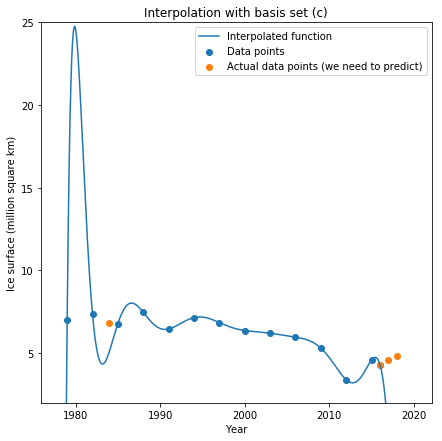

In [8]:
interpolation_ice_area = [get_function_value(time_step, coefficients) for time_step in time_steps]

# Plot it!
plt.figure(figsize=(7,7))
plt.title("Interpolation with basis set (c)")
plt.ylabel("Ice surface (million square km)")
plt.xlabel("Year")

plt.scatter(years, ice_areas, label='Data points')
plt.plot(time_steps, interpolation_ice_area, label='Interpolated function')
plt.scatter(years_to_predict, ice_areas_actual, label="Actual data points (we need to predict)")

plt.ylim(2, 25)
plt.legend()

# predicted points
print("Predicted Ice surface in 1984: ", get_function_value(1984, coefficients))
print("Predicted Ice surface in 2016: ", get_function_value(2016, coefficients))
print("Predicted Ice surface in 2017: ", get_function_value(2017, coefficients))
print("Predicted Ice surface in 2018: ", get_function_value(2018, coefficients))

#### Discussion of exercise 3

The coefficients of the polynomial are given in the following table: 

\begin{array}{|c|c|}
\hline Parameter & \text{Basis (c) Value} & \text{Basis (b) Value} & \text{Basis (a) Value}\\\hline
  a & 6.64 & -1.13e+2 & 1.06e+16\\\hline
  b & -3.52 & 2.2e+2 & -3.19e+13\\\hline
  c & 8.58 & -1.34e+2 & 3.81e+10\\\hline
  d & 35.31 & 4.13e+1 & -2.19e+07\\\hline
  e & -194.92 & -7.66 & 5.40e+03\\\hline
  f & -63.98 & 9.28e-1 & -1.26e-01\\\hline
  g & 1175.50 & -7.70e-2 & -5.73e-05\\\hline
  h & -488.08 & 4.50e-3 & -1.31e-08\\\hline
  i & -2890.30 & -1.87e-4 & 4.21e-12\\\hline
  j & 1860.00 & 5.47e-6 & -1.99e-14\\\hline
  k & 3032.21 & -1.11e-7 & 6.11e-18\\\hline
  l & -2199.94 & 1.47e-9 & 3.68e-21\\\hline
  m & -1123.27 & -1.16e-11 & -1.99e-24\\\hline
  n & 850.10 & 4.08e-14 & 2.55e-28\\\hline
\end{array}

The interpolated function is given in the figure in exercise 3, together with the data points needed to plot the prediction function.  The table above shows the coefficients of the polynomials required for each basis function.  The values for basis functions b and a have coefficients that cancel out the corresponding basis. In the following table, the actual values of the data points and our predictions are given. We can conclude that the predictions for the points that are in the "end" (2017/2018) of our data set are not accurate.  While the function matches the points given, it is not well fit to those outside of the dataset.  Those within the dataset may not be acurate as well, the estimation of the area around 1980-1985 oscilates significantly, showing that there there is some issues with the fit.  It also produces non-realistic results, as the results for 2017 and 2018 are negative and the system cannot physically be negative.

\begin{array}{|c|c|c|}
\hline Year & \text{Actual Data} & \text{Interpolation basis (c)}\\\hline
  1984 & 6.8 & 5.114 \\\hline
  2016 & 4.3 & 4.300\\\hline
  2017 & 4.6 & -0.138 \\\hline
  2018 & 4.8 & -12.532 \\\hline
\end{array}

## Exercise 4
How sensitive are the results to small changes in the data? To assess this, add (modest) random perturbations to the $s$ values in the dataset and recompute the interpolating function. Plot the new interpolating function together with the old one, and compare them. Also, use the new function to predict values for $t=1984$, $t=2016$ and $t=2017$, and compare these to the predictions you made before.

Predicted Ice surface in 1984:  4.7438615152637125
Predicted Ice surface in 2016:  4.226214625365086
Predicted Ice surface in 2017:  8.917670472006911
Predicted Ice surface in 2018:  43.62743120413286


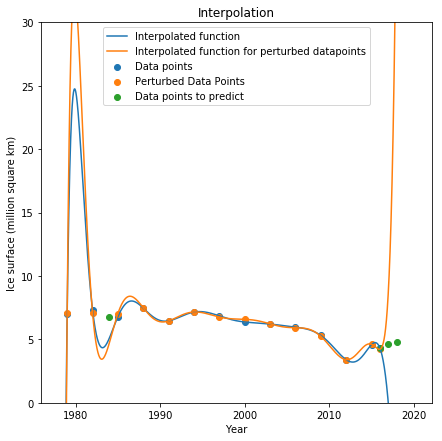

In [9]:
perturbed_ice_areas = []

for data_point in ice_areas:
    noise = np.random.rand()/2 - 0.25

    # add noise between -0.5 and 0.5
    perturbed_data_point = data_point + noise
    perturbed_ice_areas.append(perturbed_data_point)

pert_coefficients = np.linalg.solve(phi3, perturbed_ice_areas)

interpolation_perturbed = [get_function_value(time_step, pert_coefficients) for time_step in time_steps]

plt.figure(figsize=(7,7))
plt.scatter(years, ice_areas, label='Data points')
plt.scatter(years, perturbed_ice_areas, label='Perturbed Data Points')
plt.plot(time_steps, interpolation_ice_area, label='Interpolated function')
plt.plot(time_steps, interpolation_perturbed, label='Interpolated function for perturbed datapoints')

plt.scatter(years_to_predict, ice_areas_actual, label="Data points to predict")
plt.ylim(0, 30)
plt.legend()

plt.title("Interpolation")
plt.ylabel("Ice surface (million square km)")
plt.xlabel("Year")

print("Predicted Ice surface in 1984: ", get_function_value(1984, pert_coefficients))
print("Predicted Ice surface in 2016: ", get_function_value(2016, pert_coefficients))
print("Predicted Ice surface in 2017: ", get_function_value(2017, pert_coefficients))
print("Predicted Ice surface in 2018: ", get_function_value(2018, pert_coefficients))

#### Discussion of exercise 4
Noise between -0.5 and 0.5 is added to the data points. New coefficients are calculated and a new function is plotted. The newly predicted ice areas are given in the table below.

__NB:__ the predicted ice surfaces change if the cell runs again (because the noise is random).

p = perturbed data set

\begin{array}{|c|c|c|c|}
\hline Year & \text{Actual Data} & \text{Interpolation basis (c)} & \text{Interpolation basis (c) - p}\\\hline
  1984 & 6.8 & 5.114 & 5.463 \\\hline
  2016 & 4.3 & 4.300 & 3.338\\\hline
  2017 & 4.6 & -0.138 & 12.380\\\hline
  2018 & 4.8 & -12.532 & 64.484\\\hline
\end{array}

We can see that this way of interpolating is sensitive to small changes in the input data as would be expected as the function is fit to the input data.

## Exercise 5
As an alternative to interpolation, one can use minimization (e.g. linear least squares) to fit a function to the data. Use linear least squares to fit a low-degree (e.g., quadratic or cubic) polynomial to the data in the table. Plot the resulting function together with the data. Make predictions for values at $t=1984$, $t=2017$ and $t=2018$. Compare the results to the results obtained before with interpolation.

Explore the sensitivity of the least squares fit to changes in the data, in the same way as before.

In [10]:
def quadratic_polynomial(coefficients, x):
    return coefficients[0]*x**2 + coefficients[1]*x + coefficients[2]

def cubic_polynomial(coefficients, x):
    return coefficients[0]*x**3 + coefficients[1]*x**2 + coefficients[2]*x + coefficients[3]

# Design the matrices
Qm = np.array([[T**2, T, 1] for T in years])
Cm = np.array([[T**3, T**2, T, 1] for T in years])


In [11]:
# Quadratic function fitting

# Find the parameters (grab zero'th element because these are the coefficients)
qp = np.linalg.lstsq(Qm, ice_areas, rcond=None)[0]
pqp = np.linalg.lstsq(Qm, perturbed_ice_areas, rcond=None)[0]

# Calculate the line with the parameters 
yQ = quadratic_polynomial(qp, time_steps)
pyQ = quadratic_polynomial(pqp, time_steps)

In [12]:
# Cubic function fitting

# Find the parameters
cp = np.linalg.lstsq(Cm, ice_areas, rcond=None)[0]
pcp = np.linalg.lstsq(Cm, perturbed_ice_areas, rcond=None)[0]

# Calculate lines
yC = cubic_polynomial(cp, time_steps)
pyC = cubic_polynomial(pcp, time_steps)

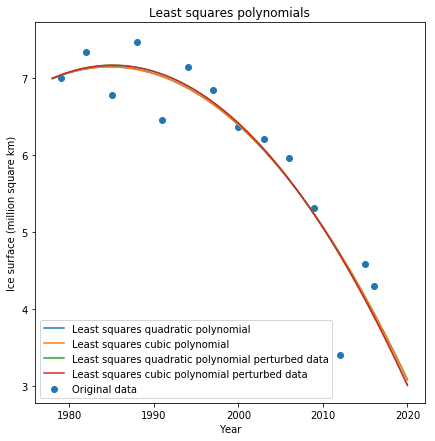

In [13]:
# Plot both fittings 
plt.figure(figsize=(7,7))
plt.title("Least squares polynomials")
plt.ylabel("Ice surface (million square km)")
plt.xlabel("Year")

plt.plot(time_steps, yQ, label='Least squares quadratic polynomial')
plt.plot(time_steps, yC, label='Least squares cubic polynomial')
plt.scatter(years, ice_areas, label='Original data')

plt.plot(time_steps, pyQ, label='Least squares quadratic polynomial perturbed data')
plt.plot(time_steps, pyC, label='Least squares cubic polynomial perturbed data')

plt.legend()
plt.show()

In [14]:
y_q1984 = quadratic_polynomial(qp, 1984)
y_c1984 = cubic_polynomial(cp, 1984)

y_q2016 = quadratic_polynomial(qp, 2016)
y_c2016 = cubic_polynomial(cp, 2016)

y_q2017 = quadratic_polynomial(qp, 2017)
y_c2017 = cubic_polynomial(cp, 2017)

y_q2018 = quadratic_polynomial(qp, 2018)
y_c2018 = cubic_polynomial(cp, 2018)

py_q1984 = quadratic_polynomial(pqp, 1984)
py_c1984 = cubic_polynomial(pcp, 1984)

py_q2016 = quadratic_polynomial(pqp, 2016)
py_c2016 = cubic_polynomial(pcp, 2016)

py_q2017 = quadratic_polynomial(pqp, 2017)
py_c2017 = cubic_polynomial(pcp, 2017)

py_q2018 = quadratic_polynomial(pqp, 2018)
py_c2018 = cubic_polynomial(pcp, 2018)

#print("Actual dataset")
#print('Predictions for t = 1984: ', 'quadratic: ', y_q1984, 'cubic: ', y_c1984)
#print('Predictions for t = 2016: ', 'quadratic: ', y_q2016, 'cubic: ', y_c2016)
#print('Predictions for t = 2017: ', 'quadratic: ', y_q2017, 'cubic: ', y_c2017)
#print('Predictions for t = 2018: ', 'quadratic: ', y_q2018, 'cubic: ', y_c2018)

#print("\nPerturbed dataset")
#print('Predictions for t = 1984: ', 'quadratic: ', py_q1984, 'cubic: ', py_c1984)
#print('Predictions for t = 2016: ', 'quadratic: ', py_q2016, 'cubic: ', py_c2016)
#print('Predictions for t = 2017: ', 'quadratic: ', py_q2017, 'cubic: ', py_c2017)
#print('Predictions for t = 2018: ', 'quadratic: ', py_q2018, 'cubic: ', py_c2018)

#### Discussion of exercise 5
The same perturbed data set as in exercise 3 is used.

After plotting in the same figure, we see that the cubic and quadratic least squares fits are almost the same.  Since the data doesnt have a distinct 2nd inflection point in the data, the two are similar.   In the table, we can also see that they give almost the same predictions for the datapoints. 
Both the quadratic and cubic functions are less senstive to outliers compared to the interpolation based predictions. When the order of the function is close to the number of data points, it can become very dependent on the input data.  

From the trend in the data, it can also be seen that the fucntions will cause unrealistic values as time increases.  the area of ice cannot be negative.

__NB:__ Again, the predictions will change if the cells run again (but less, because the LS polynomials are less sensitive to the changes in the input data)

p = perturbed data set <br/>
LS = Least Squares



\begin{array}{|c|c|c|c|}
\hline Year & \text{Actual Data} & \text{Interpolation basis (c)} & \text{Interpolation basis (c) - p} & \text{Quadratic LS} & \text{Quadratic LS - p} & \text{Cubic LS}   & \text{Cubic LS - p}\\\hline
  1984 & 6.8 & 5.114 & 5.463 & 7.149 & 7.160 & 7.148  & 7.159 \\\hline
  2016 & 4.3 & 4.300 & 3.338 & 3.957 & 4.034 & 3.955  & 4.032 \\\hline
  2017 & 4.6 & -0.138 & 12.380 & 3.749 & 3.835 & 3.745  & 3.832 \\\hline
  2018 & 4.8 & -12.532 & 64.484 & 3.534 & 3.630 & 3.529  & 3.626 \\\hline
\end{array}

## Exercise 6

Fitting a function using linear least squares can be sensitive to "outliers" in the data. As an example, create a single outlier by changing the data point for $t=2009$ from $s=5.31$ to $s=7.31$. Repeat the linear least squares fitting procedure. Discuss your results.

In [15]:
p_years = np.array([1979, 1982, 1985, 1988, 1991, 1994, 1997, 2000, 2003, 2006, 2009, 2012, 2015, 2016], dtype=np.float64)
ice_p_areas = np.array([7.00, 7.34, 6.79, 7.47, 6.46, 7.15, 6.85, 6.37, 6.21, 5.97, 7.31, 3.40, 4.59, 4.30], dtype=np.float64)

In [16]:
# Quadratic function fitting

# Find the parameters
oqp = np.linalg.lstsq(Qm, ice_p_areas, rcond=None)[0]
ocp = np.linalg.lstsq(Cm, ice_p_areas, rcond=None)[0]

# Calculate the lines
oyQ = quadratic_polynomial(oqp, time_steps)
oyC = cubic_polynomial(ocp, time_steps)

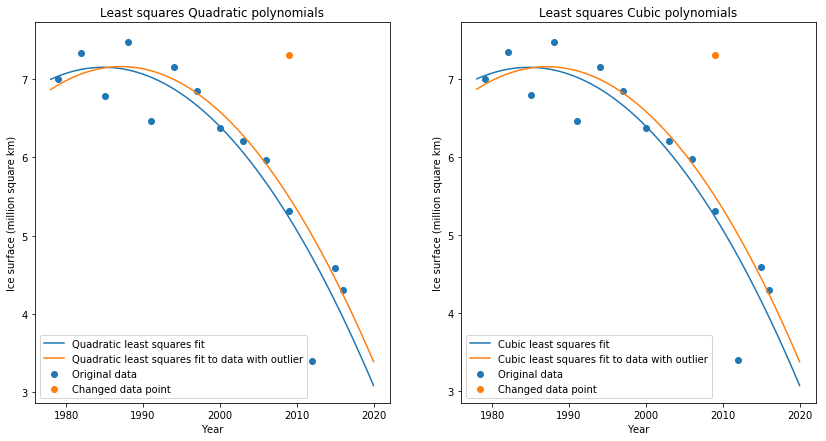

In [17]:
# Plot all four fittings

plt.figure(figsize=(14,7))

plt.subplot(1, 2, 1)
plt.plot(time_steps, yQ, label='Quadratic least squares fit')
plt.plot(time_steps, oyQ, label='Quadratic least squares fit to data with outlier')
plt.scatter(p_years, ice_areas, label='Original data')
plt.scatter(p_years[10], ice_p_areas[10], label='Changed data point')
plt.title("Least squares Quadratic polynomials")
plt.ylabel("Ice surface (million square km)")
plt.xlabel("Year")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(time_steps, yC, label='Cubic least squares fit')
plt.plot(time_steps, oyC, label='Cubic least squares fit to data with outlier')

plt.title("Least squares Cubic polynomials")
plt.ylabel("Ice surface (million square km)")
plt.xlabel("Year")
plt.scatter(p_years, ice_areas, label='Original data')
plt.scatter(p_years[10], ice_p_areas[10], label='Changed data point')

plt.legend()

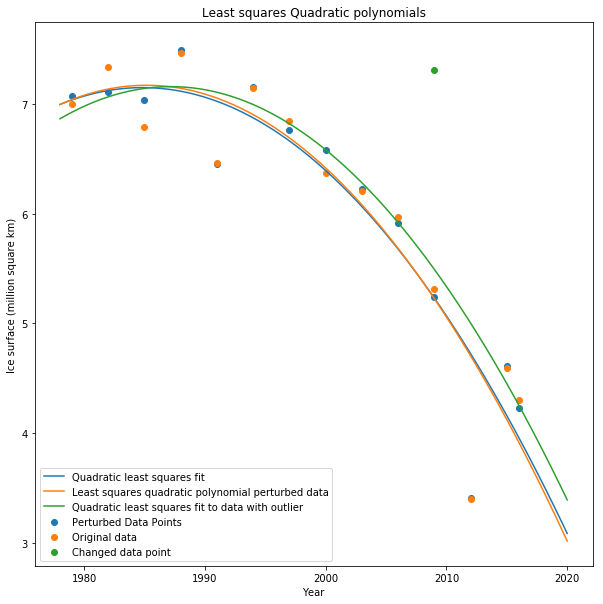

In [18]:
plt.figure(figsize=(10,10))
plt.plot(time_steps, yQ, label='Quadratic least squares fit')
plt.plot(time_steps, pyQ, label='Least squares quadratic polynomial perturbed data')
plt.plot(time_steps, oyQ, label='Quadratic least squares fit to data with outlier')
plt.scatter(years, perturbed_ice_areas, label='Perturbed Data Points')
plt.scatter(p_years, ice_areas, label='Original data')
plt.scatter(p_years[10], ice_p_areas[10], label='Changed data point')
plt.title("Least squares Quadratic polynomials")
plt.ylabel("Ice surface (million square km)")
plt.xlabel("Year")
plt.legend()


In [19]:
oy_q1984 = quadratic_polynomial(oqp, 1984)
oy_c1984 = cubic_polynomial(ocp, 1984)

oy_q2016 = quadratic_polynomial(oqp, 2016)
oy_c2016 = cubic_polynomial(ocp, 2016)

oy_q2017 = quadratic_polynomial(oqp, 2017)
oy_c2017 = cubic_polynomial(ocp, 2017)

oy_q2018 = quadratic_polynomial(oqp, 2018)
oy_c2018 = cubic_polynomial(ocp, 2018)

#print('Predictions from dataset with an outlier')
#print('Predictions for t = 1984: ', 'quadratic: ', oy_q1984, 'cubic: ', oy_c1984)
#print('Predictions for t = 2016: ', 'quadratic: ', oy_q2016, 'cubic: ', oy_c2016)
#print('Predictions for t = 2017: ', 'quadratic: ', oy_q2017, 'cubic: ', oy_c2017)
#print('Predictions for t = 2018: ', 'quadratic: ', oy_q2018, 'cubic: ', oy_c2018)

#### Discussion of exercise 6
Interpolation is done with basis (c) from exercise 2 <br/>
Predictions can be found in the table below. <br/>
QLS = Quadratic Least Squares<br/> 
CLS = Cubic Least Squares<br/>
p = perturbed dataset <br/>
o = dataset with outlier

From the above graphs it can be seen that introducing an outlier does cause a change in the fit, pulling the resulting fit closer to the outlier, but the trend of the data remains the same and the change in this case does not disturb the fit. That said, the outlier is not very big (just 7 as opposed to 5), so the 'small' change in the fit does not mean that the function is not sensitive to outliers. 
The interpolation functions predict negative values for 2017 and 2018, which is not feasible for the simulation.  

\begin{array}{|c|c|c|c|c|c|}
\hline Year & \text{Actual Data} & \text{Interpolation} & \text{Interpolation - p} & \text{QLS} & \text{QLS - p}& \text{QLS - o}& \text{CLS}   & \text{CLS - p}  & \text{CLS - o}\\\hline
1984 & 6.8 & 5.114 & 5.116 & 7.149 & 7.125& 7.125 & 7.148 & 7.123 & 7.124\\\hline
2016 & 4.3 & 4.300 & 4.416 & 3.957 & 3.956 & 4.252 & 3.955  & 3.955  & 4.249 \\\hline
2017 & 4.6 & -0.138 & 0.788 & 3.749 & 4.047 & 4.047 & 3.745 & 4.042 & 4.042 \\\hline
2018 & 4.8 & -12.532 & -10.192 & 3.534 & 3.835 & 3.835& 3.529  & 3.828 & 3.828\\\hline
\end{array}

## Exercise 7
There may be more suitable functions to fit to these data than a polynomial. For example, predictions using a polynomial may give negative values, which would be unphysical. Can you think of a suitable function, and fit it to the data? What predictions does it give? If the function is nonlinear in its parameters, fitting it by least squares will give a _nonlinear least squares_ problem (see section 6.6 in the book by Heath). 

Three functions that may be more suitable functions to fit to these data are:
the exponential function, the sigmoid function, and the cosine function. 
Regarding the plot of the datapoints, intuitively the general trend seems to have the form of the 
exponential function at first glance. The sigmoid function seems applicable too. 
The cosine function makes sense to experiment with as well, as the topic is related to the global 
temperatures, and climates can change back and forth, following a general trend like that of 
the cosine function. 
The Levenberg-Marquardt algorithm was used to fit these three functions. 
For all functions, experiments were run with different initial estimates for the parameters.

In [20]:
from scipy import interpolate
from scipy import optimize
import scipy as sp
from scipy.optimize import leastsq 
from scipy.optimize import curve_fit
from math import *


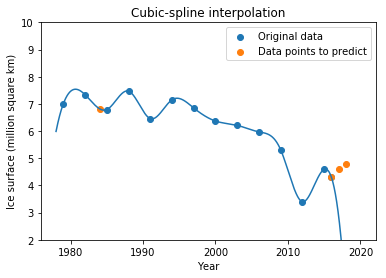

In [37]:
tck = sp.interpolate.splrep(years, ice_areas, s=0)
ynew = interpolate.splev(time_steps, tck, der=0)

plt.figure()
plt.plot(time_steps, ynew)
plt.ylim(2,10)
plt.title('Cubic-spline interpolation')
plt.scatter(years, ice_areas, label='Original data')
plt.scatter(years_to_predict, ice_areas_actual, label="Data points to predict")
plt.ylabel("Ice surface (million square km)")
plt.xlabel("Year")
plt.legend()
plt.show()

The cubic spline fit can be seen to fit the data points well, but the splines before and after the data points does not seem to follow the trend.  If compared to the known points for 1984 and 2016-2018, it can be seen that the spline matches the point for 1984 pretty good, but does not match the rest of the data.

The cosine function seems to fit well, with the fits only making sense for initial estimates of a being 0, 0.05 and 0.1. Higher than 0.1 results in an off fit, as can be seen in the example with a = 0.2.

Amplitude, period, horizontal move , equilibrium
 [-8.18891013e-01  3.05905006e-01 -7.80704649e+02  6.11463394e+00]


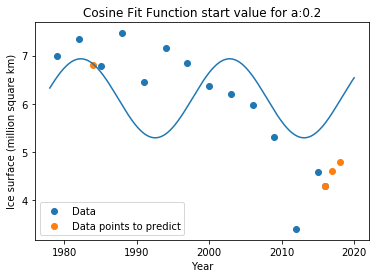

Amplitude, period, horizontal move , equilibrium
 [ 2.51528156e+00  6.19939528e-02 -2.63604079e+02  4.68642660e+00]


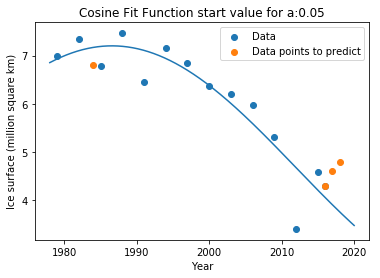

Amplitude, period, horizontal move , equilibrium
 [2.51531842e+00 6.19933151e-02 1.25670300e+03 4.68638811e+00]


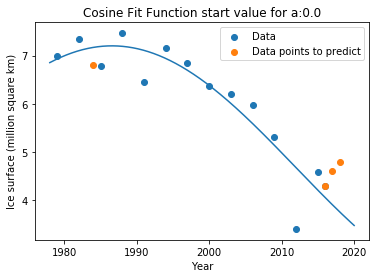

In [38]:
# fit a simple cosine function to the data
def cosine_function(x, a, b, c, d):
    return a * np.cos(b*(c + x)) + d

# With
# a = amplitude ~ 2
# 2pi/b = period ~ to find out
# c = horizontal move ~ 0?
# d = vertical move (equilibrium state) ~ 5


ps = [0.2, 0.05, 0.0]

for p in ps:
 
    params = optimize.curve_fit(cosine_function, years, ice_areas, p0=[2, p, 0, 5])[0]
    
    print("Amplitude, period, horizontal move , equilibrium\n", params)
    plt.scatter(years, ice_areas, label='Data')
    plt.plot(time_steps, cosine_function(time_steps, params[0], params[1], params[2], params[3]))
    plt.title("Cosine Fit Function start value for a:" + str(p))
    plt.ylabel("Ice surface (million square km)")
    plt.scatter(years_to_predict, ice_areas_actual, label="Data points to predict")
    plt.xlabel("Year")
    plt.legend()
    plt.show()
    


From the plots for the cosine function it can be seen that with the LM method the initial estimates can be very important. In practice, the estimates should be based on more than trial and error. This is not unique to the cosine function, the same behavior was observed with the other functions. We have simply chosen to keep the plot of the erroneous fitting of the cosine function as an example for this point.

Both of the cosine function can't get negative, but the first one (for a = 0.2) doesn't fit the data well. 

As in the sigmoid graph the initial values are once again an issue, since the start values are not close enough to the actual values, they do not converge and the function is poorly fit. This function cannot be negative either, but does not fit the data well.


c:\python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
c:\python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


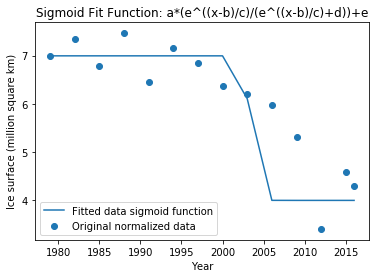

In [23]:
# fitting function: p * -e^(x * c) + d, want multiple parameters to fit
def pval(x, a, b, c, d, e):
    return a*(np.exp((x-b)*c)/(np.exp((x-b)*c)+d))+e

# initial guess for the parameters: don't really matter
p_0 = (-1, 2010, -0.0001,0.5,2)

p0 = np.array([p_0])

# Curve fit calls leastsq under the hood and uses Levenberg-Marquardt
plsq = curve_fit(pval, years, ice_areas, p0=p_0, maxfev=10000000, method='lm')#, )

# Create the actual line
vals = plsq[0][0]*(np.exp((years-plsq[0][1])/plsq[0][2])/(np.exp((years-plsq[0][1])/plsq[0][2])+plsq[0][3]))+plsq[0][4]

plt.scatter(years, ice_areas, label='Original normalized data')
plt.plot(years, vals, label='Fitted data sigmoid function')
plt.legend()
plt.title("Sigmoid Fit Function: a*(e^((x-b)/c)/(e^((x-b)/c)+d))+e")
plt.ylabel("Ice surface (million square km)")
plt.xlabel("Year")
plt.show()

#print(plsq)

The exponential function seems to fit the data well, as expected at first glance on the datapoints. A possible tweak to improve the fit would be to experiment with higher initial values for parameter d, closer to 3 to be precise, to try and create a sigmoid type function.


c:\python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
c:\python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


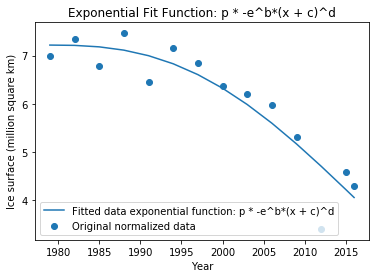

In [24]:
# fitting function: p * -e^b*(x + c)^d, want multiple parameters to fit
def pval(x, p, b, c, d):
    return p*-np.exp(b*(x+c)**d)
    #return c + p*np.log(x)
    #return c*np.cos(p*x) + 1

# initial guess for the parameters: don't really matter
p_0 = (5, -0.0001, -1960, 2.5)

p0 = np.array([p_0])

# Curve fit calls leastsq under the hood and uses Levenberg-Marquardt
plsq = curve_fit(pval, years, ice_areas, p0=p_0, maxfev=10000000)#, method='lm')

# Create the actual line
vals = plsq[0][0]*-np.exp(plsq[0][1]*(years+plsq[0][2])**plsq[0][3])
#vals = plsq[0][0] + plsq[0][1]*np.log(years)
#vals = plsq[0][1]* np.cos(plsq[0][1]*years) + 1

plt.scatter(years, ice_areas, label='Original normalized data')
plt.plot(years, vals, label='Fitted data exponential function: p * -e^b*(x + c)^d')
plt.legend()
plt.title("Exponential Fit Function: p * -e^b*(x + c)^d")
plt.ylabel("Ice surface (million square km)")
plt.xlabel("Year")
plt.show()

#print(plsq)

In [25]:
# predictions with the exponential function

_1984 = plsq[0][0]*-np.exp(plsq[0][1]*(1984+plsq[0][2])**plsq[0][3])
_2016 = plsq[0][0]*-np.exp(plsq[0][1]*(2016+plsq[0][2])**plsq[0][3])
_2017 = plsq[0][0]*-np.exp(plsq[0][1]*(2017+plsq[0][2])**plsq[0][3])
_2018 = plsq[0][0]*-np.exp(plsq[0][1]*(2018+plsq[0][2])**plsq[0][3])
#print(_1984)
#print(_2016)
#print(_2017)
#print(_2018)

In [29]:
# predictions with the cosine function 
ps = [0]
params = optimize.curve_fit(cosine_function, years, ice_areas, p0=[2, p, 0, 5])[0]
#print(cosine_function(1984, params[0], params[1], params[2], params[3]))
#print(cosine_function(2016, params[0], params[1], params[2], params[3]))
#print(cosine_function(2017, params[0], params[1], params[2], params[3]))
#print(cosine_function(2018, params[0], params[1], params[2], params[3]))

Predictions with the cosine (initial estimate a:0) and the exponential function, rounded to 3 decimals
\begin{array}{|c|c|c|c|}
\hline Year & \text{Actual Data} & \text{CLS} & \text{Cosine function a:0} & \text{Exponential function} \\\hline
  1984 & 6.8 & 7.148 & 6.822 & 7.195 \\\hline
  2016 & 4.3 & 3.955 & 5.600& 4.058 \\\hline
  2017 & 4.6 & 3.745 & 5.816 & 3.894 \\\hline
  2018 & 4.8 & 3.529 & 6.060 & 3.730 \\\hline
\end{array}




The predictions obtained with the cosine and exponential functions show expected trends. The cosine function shows an increase of ice areas in 2018, whereas the exponential function expects further decrease. 

From our earlier findings on the effect of the initial estimates for parameters and the predictions (which support what we have referred to earlier as a general 'form of the exponential/cosine function'), it can be seen that when fitting, it is important to refer to domain experts when choosing functions to fit to the data. It may or may not make sense to try to fit a cosine function based on how oscillating global temperatures (and other variables that influence the size of the ice caps) are, or the exponential function may make less sense based on changes applied in global emission regulations (which would mean a further, continuing decrease is less likely). 

From the table above it can be seen that for 1984 the cosine function is relatively close.  As the the function leaves the data range, the values start to drift from the actual data. From this it could be deduced that a piecewise function using the cosine and other methods tested might be a better predicter.

**Conclusions**<br/>
We can see that some basis for the Vandermonde matrix for Interpolation with Polynomials are better conditioned then others. But the Interpolated function is still very sensitive to small changes in the input data. The LS methods used later are better, but could still give negative predictions for the Ice Area in the far future. This makes us think that the Cosine/Exponential functions are better, while giving similar results for the predictions of years 1984 and 2016-2018. 

The cosine functions would indicate that there is an equally periodic rise and fall in the ice levels, which we know is not completely true. It is not completely periodic, and due to human interference with the climate the trends observed now will not follow the general trends of the past.  

**Future work**<br/>
Since the fitting seems to be sensitive to the inital values when using the fit functions, it would be good to test with a wider range of intial values to determine the optimum starting position to fit the functions.  In addition it can be seen that some of the functions fit better for some parts of the data than others, therefore the use of a piecewise function might be benifiical.

Also some more testing with sensitivity to minor changes in input data could be done.